In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
from numpy import interp

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from sklearn import svm, datasets

from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
# Load data
data = pd.read_csv("winequality-white.csv", sep=";")
data['target'] = np.where(data['quality']<=5,0,1)

# print(data.columns)
# print(data.info())

In [3]:
# Random State
random_state = 42

# Assign X and y
X = data.drop(["quality", "target"], axis=1)
y= data.target

# Split the data between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# Set Classifier (model)
model1 = LogisticRegression(random_state=random_state, max_iter=1000)
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()
model4 = GaussianNB()
model5 = KNeighborsClassifier()
model6 = MLPClassifier()

# Fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)

# Predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)
pred_prob6 = model6.predict_proba(X_test)

In [5]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

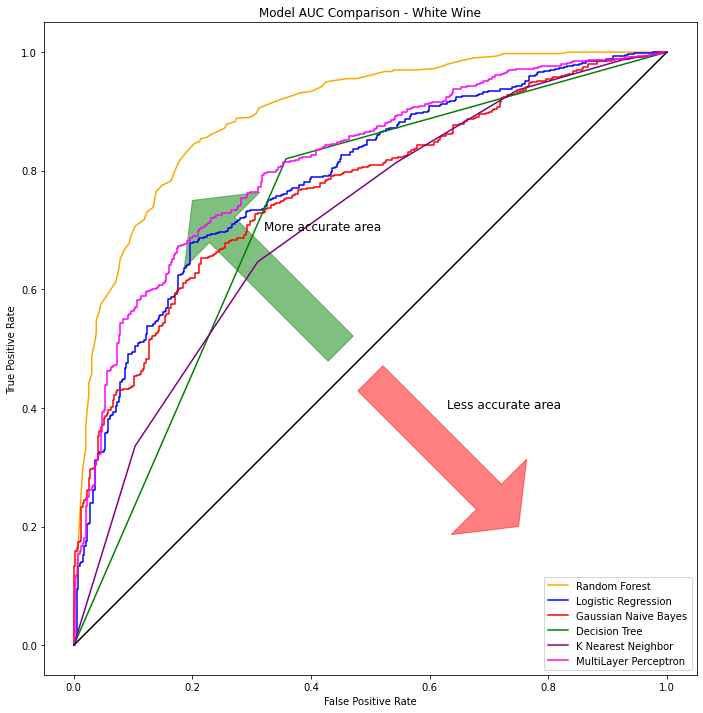

In [6]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='solid',color='orange', label='Random Forest')
plt.plot(fpr1, tpr1, linestyle='solid',color='blue', label='Logistic Regression')
plt.plot(fpr4, tpr4, linestyle='solid',color='red', label='Gaussian Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='solid',color='green', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='solid',color='purple', label='K Nearest Neighbor')
plt.plot(fpr6, tpr6, linestyle='solid',color='fuchsia', label='MultiLayer Perceptron')
plt.plot(p_fpr, p_tpr, linestyle='solid', color='black')

# title
plt.title('ROC curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('ROC',dpi=600)
plt.title('Model AUC Comparison - White Wine')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.savefig('AUC_comparison_White.png')
plt.savefig('Needs Title.pdf')
plt.show();

In [25]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])

mean_roc_auc1 = auc_score1.mean()
mean_roc_auc2 = auc_score2.mean()
mean_roc_auc3 = auc_score3.mean()
mean_roc_auc4 = auc_score4.mean()
mean_roc_auc5 = auc_score5.mean()
mean_roc_auc6 = auc_score6.mean()

## MulitLayer Perceptron

In [8]:
# Set Classifier (model)
model = MLPClassifier()

# K-fold Cross Validation
cv = StratifiedKFold(n_splits=5,shuffle=False)

# Assign X and y
X = data.drop(["quality", "target"], axis=1)
y= data.target

# Split the data between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

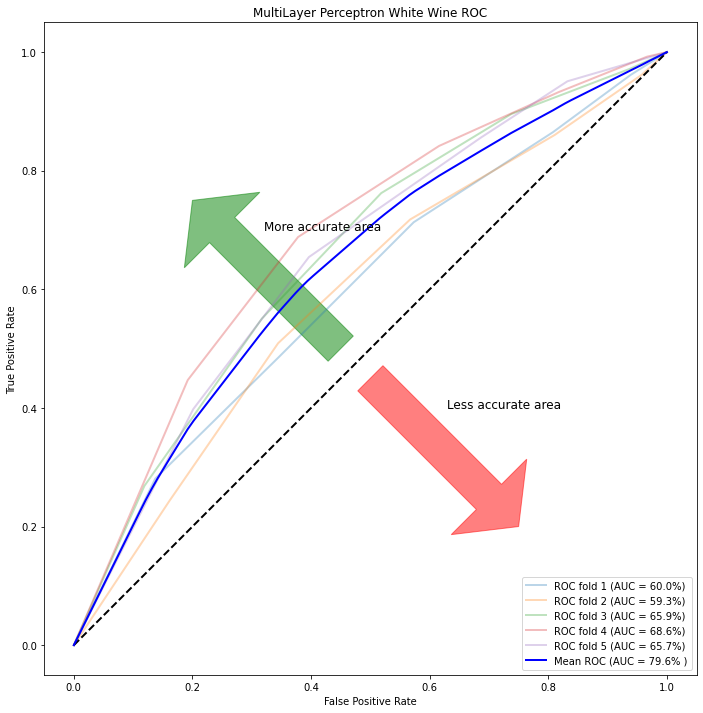

In [27]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = model.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.1f%%)' % (i, roc_auc*100))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc6 = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %.1f%% )' % (mean_auc1*100),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MultiLayer Perceptron White Wine ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.savefig('MultiLayer_Perceptron_White_AUC.png')
plt.savefig('MultiLayer_Perceptron_White_AUC.pdf')
plt.show()

## Logistic Regression

In [10]:
# Set Classifier (model)
model = LogisticRegression(random_state=random_state, max_iter=1000)

# K-fold Cross Validation
cv = StratifiedKFold(n_splits=5,shuffle=False)

# Assign X and y
X = data.drop(["quality", "target"], axis=1)
y= data.target

# Split the data between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


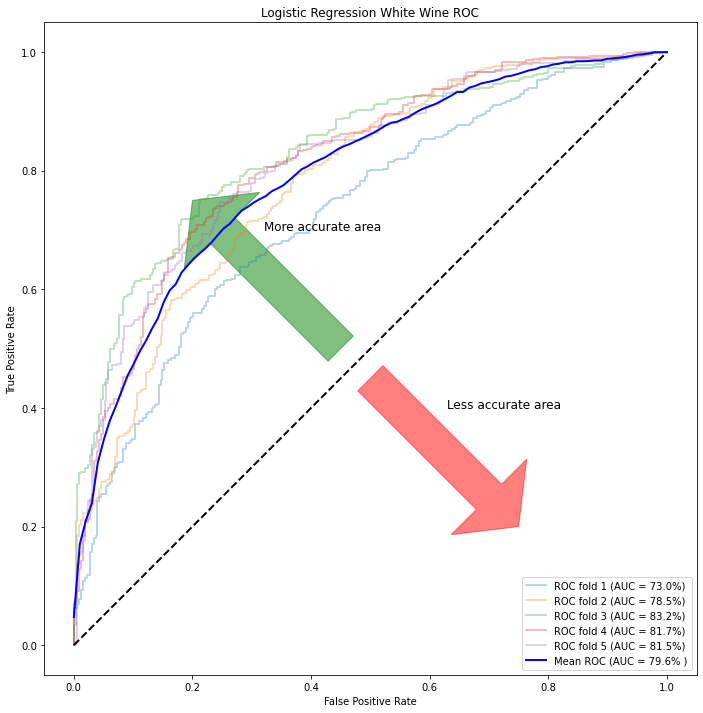

In [11]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = model.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.1f%%)' % (i, roc_auc*100))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc1 = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %.1f%% )' % (mean_auc1*100),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression White Wine ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.savefig('Logistic_Regression_Red.png')
plt.savefig('Logistic_Regression_Red.pdf')
plt.show()

## Random Forest

In [12]:
# Set Classifier (model)
model = RandomForestClassifier(random_state=random_state)

# K-fold Cross Validation
cv = StratifiedKFold(n_splits=5,shuffle=False)

# Assign X and y
X = data.drop(["quality", "target"], axis=1)
y= data.target

# Split the data between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

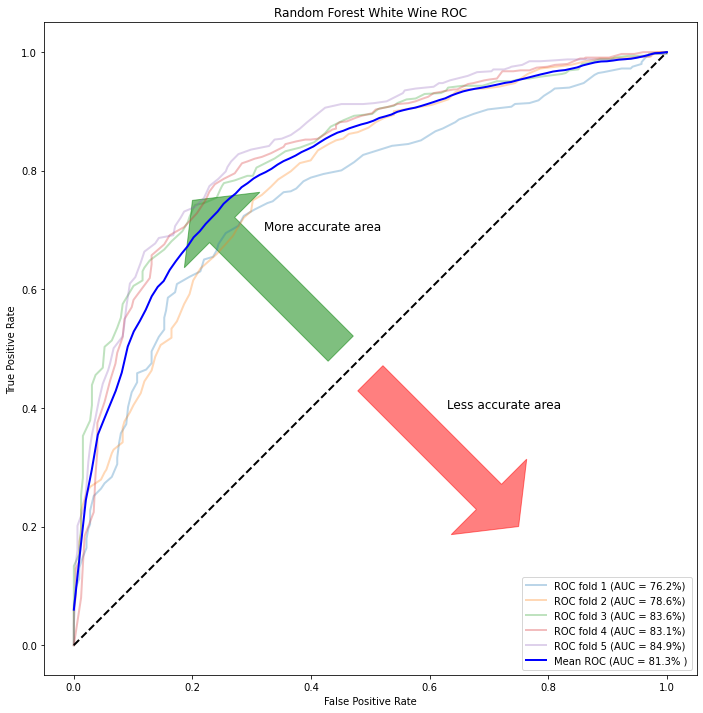

In [13]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = model.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.1f%%)' % (i, roc_auc*100))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc2 = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.1f%% )' % (mean_auc2*100.0),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest White Wine ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.savefig('Random_Forest_Red.png')
plt.savefig('Random_Forest_Red.pdf')
plt.show()

## Decision Tree

In [14]:
# Set Classifier (model)
model = DecisionTreeClassifier(random_state=random_state)

# K-fold Cross Validation
cv = StratifiedKFold(n_splits=5,shuffle=False)

# Assign X and y
X = data.drop(["quality", "target"], axis=1)
y= data.target

# Split the data between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

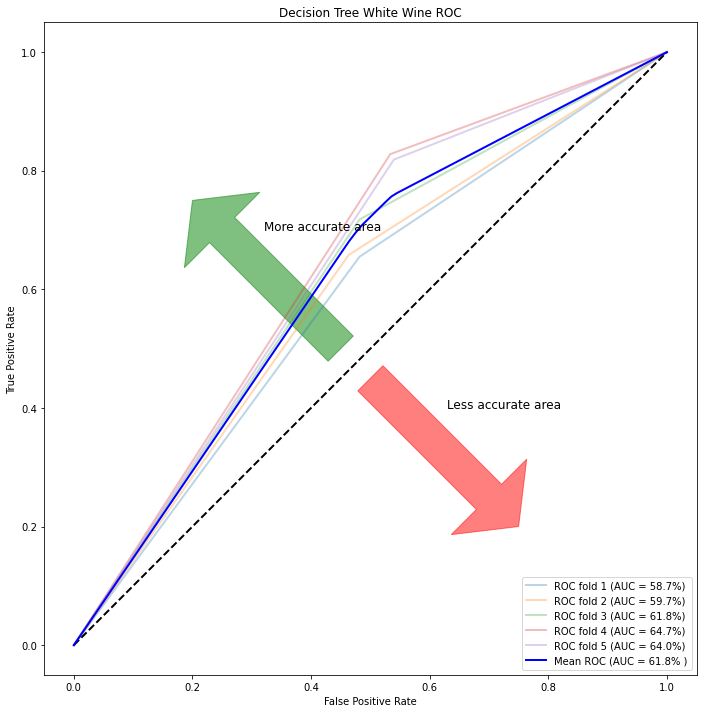

In [15]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = model.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.1f%%)' % (i, roc_auc*100))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc3 = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.1f%% )' % (mean_auc3*100.0),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree White Wine ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.savefig('Decision_Tree_Red.png')
plt.savefig('Decision_Tree_Red.pdf')
plt.show()

## Gaussian Naive Bayes

In [16]:
# Set Classifier (model)
model = GaussianNB()

# K-fold Cross Validation
cv = StratifiedKFold(n_splits=5,shuffle=False)

# Assign X and y
X = data.drop(["quality", "target"], axis=1)
y= data.target

# Split the data between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

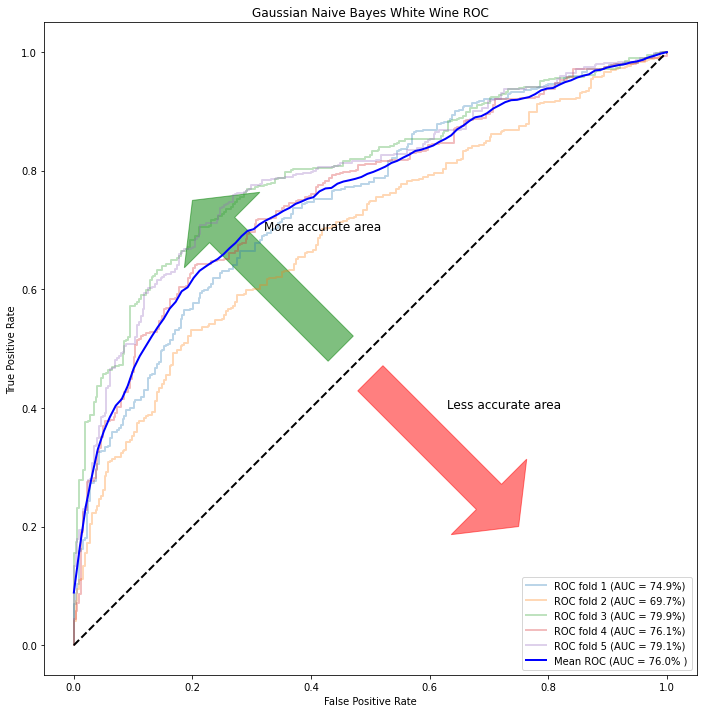

In [17]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = model.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.1f%%)' % (i, roc_auc*100))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc4 = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.1f%% )' % (mean_auc4*100.0),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes White Wine ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.savefig('Gaussian_Naive_Bayes_Red.png')
plt.savefig('Gaussian_Naive_Bayes_Red.pdf')
plt.show()

## K Nearest Neighbor

In [18]:
# Set Classifier (model)
model = KNeighborsClassifier()

# K-fold Cross Validation
cv = StratifiedKFold(n_splits=5,shuffle=False)

# Assign X and y
X = data.drop(["quality", "target"], axis=1)
y= data.target

# Split the data between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

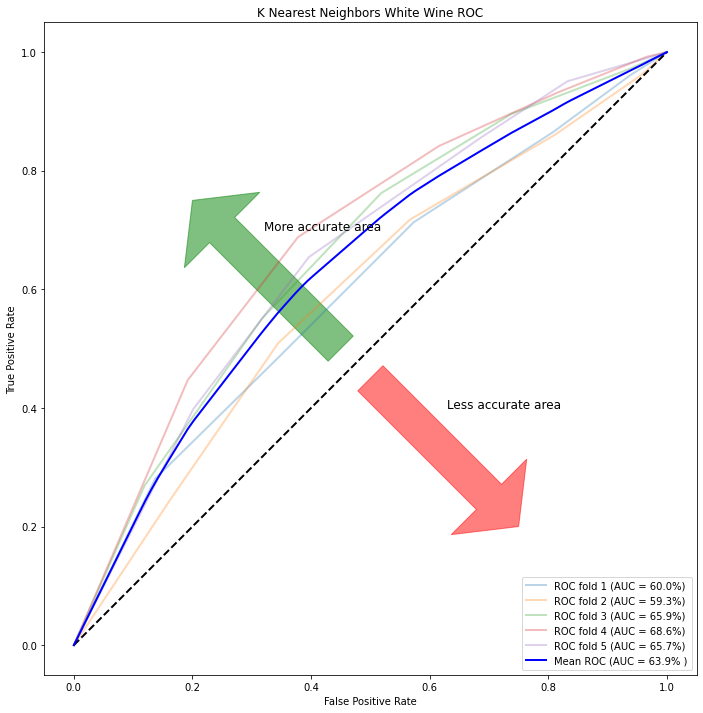

In [19]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = model.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.1f%%)' % (i, roc_auc*100))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc5 = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.1f%% )' % (mean_auc5*100.0),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K Nearest Neighbors White Wine ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.savefig('KNN_Red.png')
plt.savefig('KNN_Red.pdf')
plt.show()

In [29]:
print(f"Mean ROC AUC Scores ")
print(f"-------------------------------")
# print("Random Forest White Wine Mean AUC Score: %.1f%%" % (mean_roc_auc*100.0))
print("Random Forest:  %.1f%%" % (mean_roc_auc2*100))
print("Logistic Regression: %.1f%%" % (mean_roc_auc1*100))
print("Gaussian Naive Bayes:  %.1f%%" % (mean_roc_auc4*100))
print("Decision Tree:  %.1f%%" % (mean_roc_auc3*100))
print("K Nearest Neighbor:  %.1f%%" % (mean_roc_auc5*100))
print("MultiLayer Perceprton:  %.1f%%" % (mean_roc_auc6*100))

Mean ROC AUC Scores
-------------------------------
Random Forest:  89.7%
Logistic Regression: 78.8%
Gaussian Naive Bayes:  76.8%
Decision Tree:  73.1%
K Nearest Neighbor:  71.3%
MultiLayer Perceprton:  81.4%


In [30]:
# Printing the averaged score over the # of Kfolds
print(f"Mean AUC Scores")
print(f"-------------------------------")
print("Random Forest: %.1f%%" % (mean_auc2*100.0))
print("Logistic Regression: %.1f%%" % (mean_auc1*100.0))
print("Gaussian Naive Bayes: %.1f%%" % (mean_auc4*100.0))
print("K Nearest Neighbor: %.1f%%" % (mean_auc5*100.0))
print("Decision Tree: %.1f%%" % (mean_auc3*100.0))
print("MultiLayer Perceptron: %.1f%%" % (mean_auc6*100.0))

Mean AUC Scores
-------------------------------
Random Forest: 81.3%
Logistic Regression: 79.6%
Gaussian Naive Bayes: 76.0%
K Nearest Neighbor: 63.9%
Decision Tree: 61.8%
MultiLayer Perceptron: 63.9%


In [22]:
# https://www.kaggle.com/kanncaa1/roc-curve-with-k-fold-cv
# Create random forest classifier and 5 fold cross validation
# In k fold cross validation, data set is divided into k subsets and method is repeated k times. 
# Each time one of the k subset is used for test set and others are training set. 
# After that, average accuracy across all k trials is computed.

```
AUC (Area under the ROC Curve)
An evaluation metric that considers all possible classification thresholds.
```
```
The Area Under the ROC curve is the probability that a classifier will be more confident that a randomly chosen positive example is actually positive than that a randomly chosen negative example is positive.
```
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=AUC%20represents%20the%20probability%20that,has%20an%20AUC%20of%201.0.&text=AUC%20is%20scale%2Dinvariant.


```
Receiver Operating Characteristic (ROC) with cross validation
```
```
Example of Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality using cross-validation.
```
```
ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.
```
```
The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.
```
```
This example shows the ROC response of different datasets, created from K-fold cross-validation. Taking all of these curves, it is possible to calculate the mean area under curve, and see the variance of the curve when the training set is split into different subsets. This roughly shows how the classifier output is affected by changes in the training data, and how different the splits generated by K-fold cross-validation are from one another.
```
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html